# python versus R
## simple data analysis, wrangling, and plotting
Below is R # commented python equivalent  
python equivalent in basic_python notebook in same folder

In [168]:
x <- 2   # x = 2
y <- x^2 # y = x**2
y        # y

[1] 4

Let's get some nice kind of meaninful data. For instance an exceprt of the data available at Gapminder.org, namely the for 142 countries, values for life expectancy, GDP per capita, and population, every five years, from 1952 to 2007 (2007 onwards would be great). This data was saved to .csv from R's gapminder package.

In [169]:
 # import pandas as pd
gapminder_data <- read.csv("https://raw.githubusercontent.com/berndtlindner/R_and_python/master/data/gapminder_lifeExp_gdp.csv") # gapminder_data = pd.read_csv("https://raw.githubusercontent.com/berndtlindner/R_and_python/initial/data/gapminder_lifeExp_gdp.csv")

In [170]:
class(gapminder_data) # type(gapminder_data)

[1] "data.frame"

In [171]:
dim(gapminder_data)

[1] 1704    7

In [172]:
str(gapminder_data)

'data.frame':	1704 obs. of  7 variables:
 $ X        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ country  : Factor w/ 142 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ continent: Factor w/ 5 levels "Africa","Americas",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ year     : int  1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 ...
 $ lifeExp  : num  28.8 30.3 32 34 36.1 ...
 $ pop      : int  8425333 9240934 10267083 11537966 13079460 14880372 12881816 13867957 16317921 22227415 ...
 $ gdpPercap: num  779 821 853 836 740 ...


In [173]:
head(gapminder_data)

X,country,continent,year,lifeExp,pop,gdpPercap
1,Afghanistan,Asia,1952,28.801,8425333,779.4453
2,Afghanistan,Asia,1957,30.332,9240934,820.8530
3,Afghanistan,Asia,1962,31.997,10267083,853.1007
4,Afghanistan,Asia,1967,34.020,11537966,836.1971
5,Afghanistan,Asia,1972,36.088,13079460,739.9811
6,Afghanistan,Asia,1977,38.438,14880372,786.1134


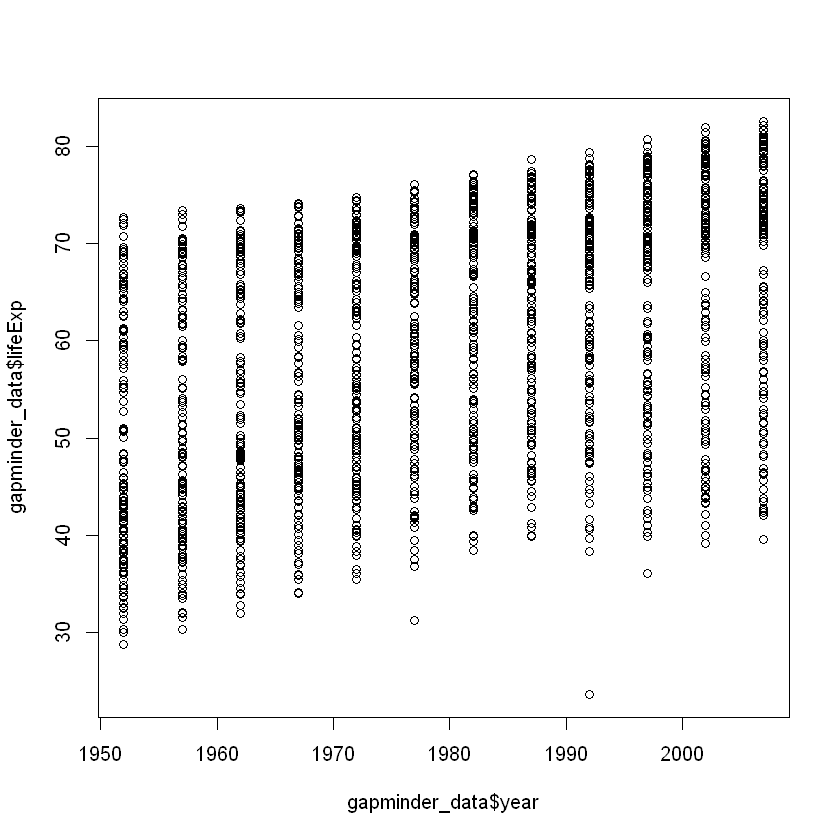

In [174]:
plot(gapminder_data$year, gapminder_data$lifeExp)
#below will also work (looks bit more like pyhton)
#plot(gapminder_data[['year']], gapminder_data[['lifeExp']])

In [175]:
unique(gapminder_data$continent)

[1] Asia     Europe   Africa   Americas Oceania 
Levels: Africa Americas Asia Europe Oceania

Let's rank how well each continent is doing based on Average life expectacny over the entire data's period.
We will use R's dplyr package for this (in python this will be equivalently the pandas package)

In [176]:
library(dplyr)
summarise(group_by(gapminder_data, continent), mean(lifeExp))

continent,mean(lifeExp)
Africa,48.86533
Americas,64.65874
Asia,60.06490
Europe,71.90369
Oceania,74.32621


Let's say we want to dig deeper and further group by 'year' as well.

In [177]:
data <- summarise(group_by(gapminder_data, continent, year), mean(lifeExp))
head(data)

continent,year,mean(lifeExp)
Africa,1952,39.13550
Africa,1957,41.26635
Africa,1962,43.31944
Africa,1967,45.33454
Africa,1972,47.45094
Africa,1977,49.58042


As you can see with many functions, we have many functions within functions (via `(` brackets)). For prettier code R has a   beautiful pipe (`%>`) operator. So above command will be 

In [178]:
#data <- summarise(group_by(gapminder_data, continent, year), mean(lifeExp))
data <-  gapminder_data  %>% 
group_by(continent, year)  %>% 
summarise(lifeExp_mean = mean(lifeExp))
#head(data)
data  %>%  head()

continent,year,lifeExp_mean
Africa,1952,39.13550
Africa,1957,41.26635
Africa,1962,43.31944
Africa,1967,45.33454
Africa,1972,47.45094
Africa,1977,49.58042


The `filter` function in dplyr is very userful

In [179]:
data_joined %>% filter(continent=="Africa") %>% head()
data_joined %>% filter(continent!="Africa") %>% head()
data_joined %>% filter(continent %in% c("Europe", "Asia")) %>% head()

continent,year,lifeExp_mean,color
Africa,1952,39.13550,green
Africa,1957,41.26635,green
Africa,1962,43.31944,green
Africa,1967,45.33454,green
Africa,1972,47.45094,green
Africa,1977,49.58042,green


continent,year,lifeExp_mean,color
Americas,1952,53.27984,purple
Americas,1957,55.96028,purple
Americas,1962,58.39876,purple
Americas,1967,60.41092,purple
Americas,1972,62.39492,purple
Americas,1977,64.39156,purple


continent,year,lifeExp_mean,color
Asia,1952,46.31439,red
Asia,1957,49.31854,red
Asia,1962,51.56322,red
Asia,1967,54.66364,red
Asia,1972,57.31927,red
Asia,1977,59.61056,red


Let's plot this.

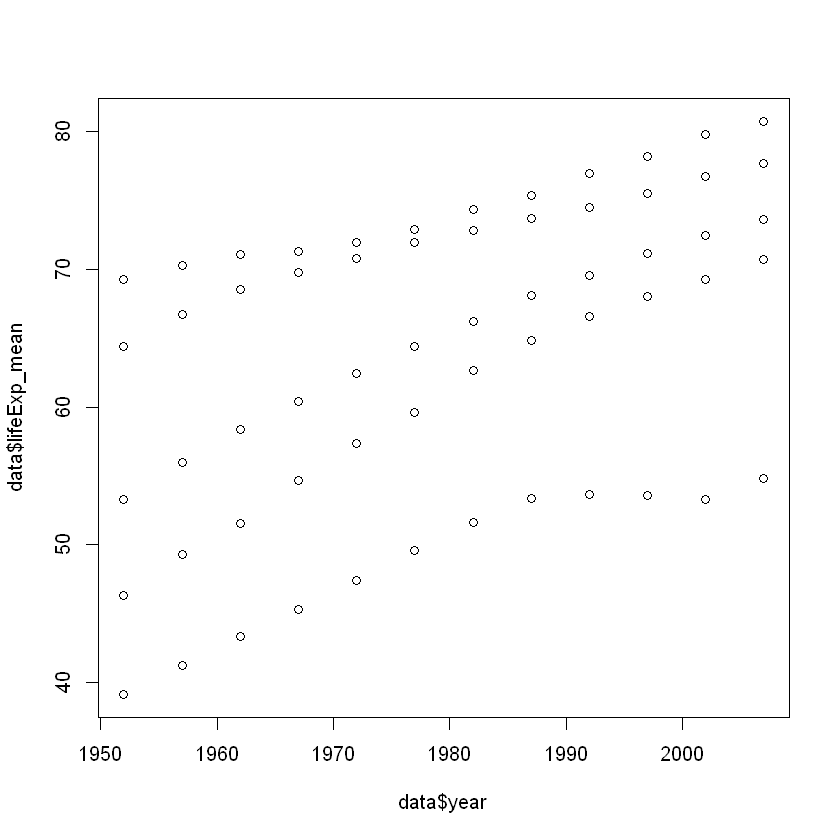

In [180]:
plot(x= data$year,y= data$lifeExp_mean)
#legend("bottomright", legend=levels(factor(data$continent)), text.col=seq_along(levels(factor(data$continent))))

I would like to plot scatter plot by color per continent. Let's first `join` on a color column on our data.

In [181]:
continent_color <- data.frame(continent=c("Asia", "Europe","Africa", "Americas", "Oceania"),
                               color=c("red", "blue", "green", "purple", "purple"))

continent_color
data_joined <- data  %>% 
left_join(continent_color, by = "continent")
head(data_joined)

continent,color
Asia,red
Europe,blue
Africa,green
Americas,purple
Oceania,pink


continent,year,lifeExp_mean,color
Africa,1952,39.13550,green
Africa,1957,41.26635,green
Africa,1962,43.31944,green
Africa,1967,45.33454,green
Africa,1972,47.45094,green
Africa,1977,49.58042,green


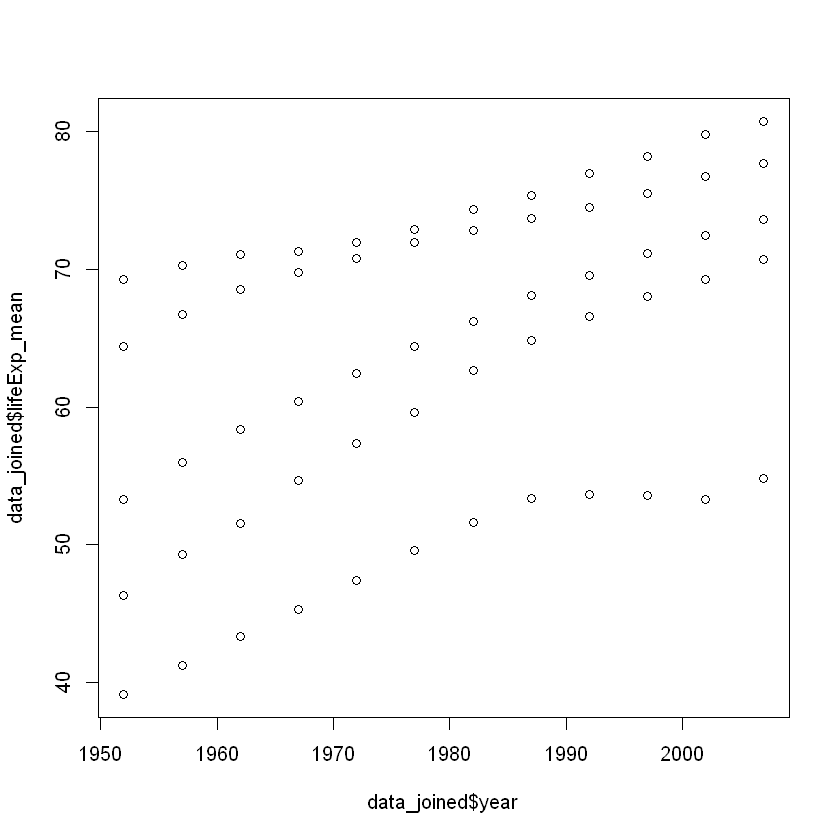

In [182]:
plot(x= data_joined$year,y = data_joined$lifeExp_mean)

Advanced R users will know that usually it is better use the `ggplot2` package to plot in R

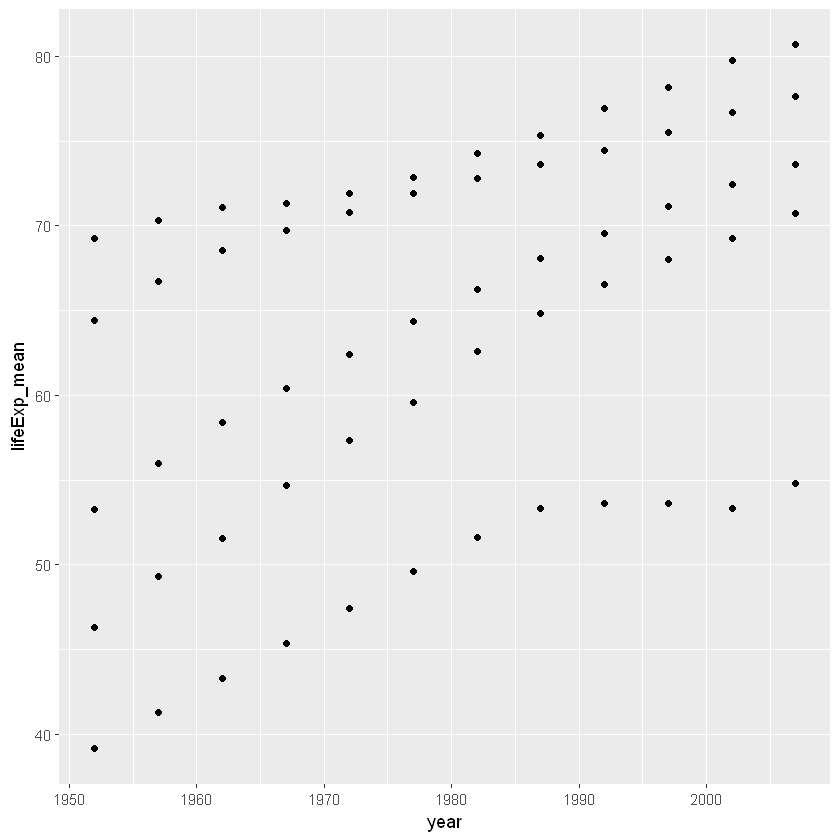

In [183]:
library(ggplot2)
p <- ggplot(data_joined, aes(x = year, y = lifeExp_mean)) +
geom_point()
p

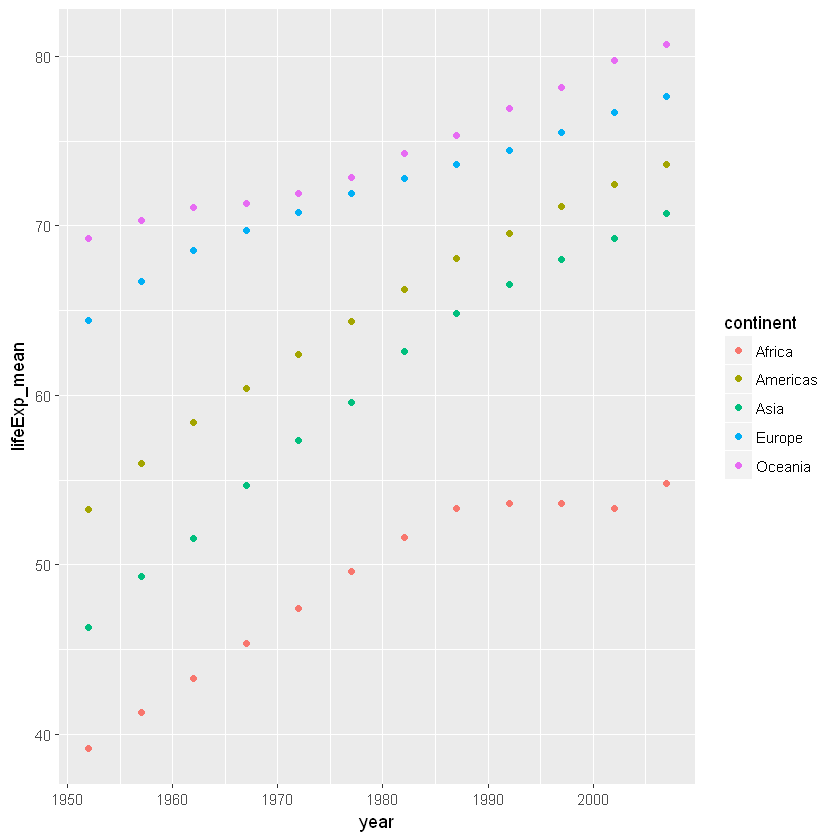

In [184]:
p <- ggplot(data_joined, aes(x = year, y = lifeExp_mean, col=continent)) +
geom_point()
p

As you can see ggplot auutomatically assigned colors for us, however we would like to manually define the colors.

In [185]:
continent_color_vector <- setNames(as.character(continent_color$color),as.character(continent_color$continent))

p <- ggplot(data_joined, aes(x = year, y = lifeExp_mean, col=continent)) + 
geom_point() +
scale_colour_manual(values=continent_color_vector) + #change c
p

ERROR: Error: Don't know how to add o to a plot


In [ ]:
lm(data_joined$year ~ data_joined$lifeExp_mean) #Fitting Linear Models [lm(y ~ x1+x2+....)]

In [ ]:
p <- ggplot(data_joined, aes(x = year, y = lifeExp_mean, col=continent)) + 
geom_point() +
scale_colour_manual(values=continent_color_vector) + #change color scale
theme_bw() #chagne theme to black and white
p

Let's fit a linear model to  expected life expectency (also let's exclude "Oceania")
We use the `broom` package, which converts statistical analysis objects (for example the `lm` function or any user defined function) in R into tidy format

In [ ]:
data_joined %>% 
filter(continent!="Oceania")  %>%  #not interested in Oceania
do(tidy(lm(lifeExp_mean ~ year, .)))

ggolot also can also calculated this and plot for us (using R's lm function)

In [ ]:
p <- p + # remember we defined p earlier
geom_smooth(method=lm, se=FALSE, fullrange=TRUE) #se
p